In [29]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

%matplotlib inline

In [55]:
succ_rate = np.array([[0]])
efficiency = np.array([np.zeros(100)])
errors = np.array([np.zeros(100)])
not_optimal = np.array([np.zeros(100)])

In [56]:
for File in os.listdir(os.getcwd()):
    if File.endswith('.pkl'):
        with open(File, 'rb') as f:
            res = pickle.load(f)
            succ = np.array([[res.get('Success_rate')]])
            eff = np.array([res.get('Efficiency')])
            err = np.array([res.get('Errors')])
            nopt = np.array([res.get('Not_optimal_moves')])
            
            succ_rate = np.concatenate((succ_rate,succ), axis = 0)
            efficiency = np.concatenate((efficiency, eff), axis = 0)
            errors = np.concatenate((errors, err), axis = 0)
            not_optimal = np.concatenate((not_optimal, nopt), axis = 0)
            

In [57]:
eff.shape

(1L, 100L)

In [58]:
succ_rate = np.delete(succ_rate, 0, axis=0)
efficiency = np.delete(efficiency, 0, axis=0)
errors = np.delete(errors, 0, axis=0)
not_optimal = np.delete(not_optimal, 0, axis=0)

In [59]:
avg_succ_rate = np.average(succ_rate, axis=0)
avg_efficiency = np.average(efficiency, axis=0)
avg_errors = np.average(errors, axis=0)
avg_not_optimal = np.average(not_optimal, axis=0)

In [60]:
x = range(0,100)
print np.average(succ_rate)
print succ_rate

0.993
[[ 0.98]
 [ 1.  ]
 [ 1.  ]
 [ 1.  ]
 [ 1.  ]
 [ 0.99]
 [ 1.  ]
 [ 0.98]
 [ 0.99]
 [ 0.99]]


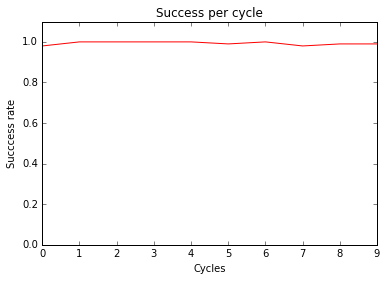

In [61]:
plt.figure()
plt.plot(range(0,10), succ_rate, 'r-')
plt.xlabel('Cycles')
plt.ylabel('Succcess rate')
plt.title('Success per cycle')
axes = plt.gca()
axes.set_ylim([0,1.1])
plt.savefig('success_rate_alpha=eps=40_g09.png')
plt.show()

In [62]:
slope, intercept, _r_value, _p_value, _std_err  = linregress(x, avg_efficiency)
y = np.multiply(x, slope) + intercept
slope

-0.018666666666666661

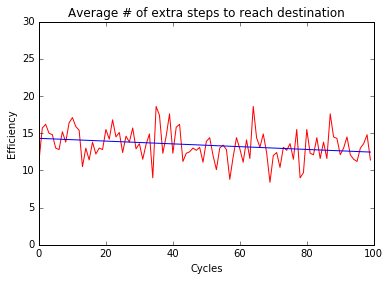

In [63]:
plt.figure()
plt.plot(x, avg_efficiency, 'r-')
plt.plot(x, y, 'b-')
plt.xlabel('Cycles')
plt.ylabel('Efficiency')
plt.title('Average # of extra steps to reach destination')
axes = plt.gca()
axes.set_ylim([0,30])
plt.savefig('efficiency_alpha=eps=40_g09.png')
plt.show()

In [64]:
slope, intercept, _r_value, _p_value, _std_err  = linregress(x, avg_errors)
y = np.multiply(x, slope) + intercept
slope

-0.0046504650465046503

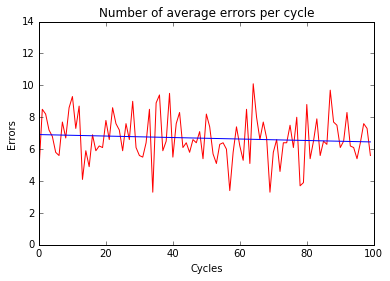

In [65]:
plt.figure()
plt.plot(x, avg_errors, 'r-')
plt.plot(x, y, 'b-')
axes = plt.gca()
axes.set_ylim([0,14])
plt.xlabel('Cycles')
plt.ylabel('Errors')
plt.title('Number of average errors per cycle')
plt.savefig('errors_alpha=eps=40_g09.png')
plt.show()          

In [66]:
slope, intercept, _r_value, _p_value, _std_err  = linregress(x, avg_not_optimal)
y = np.multiply(x, slope) + intercept
print slope

-0.00121212121212


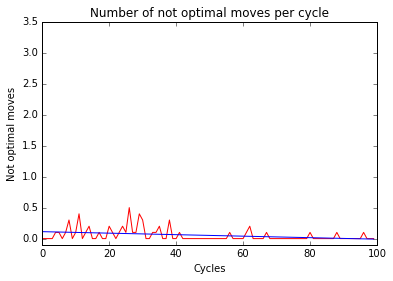

In [69]:
plt.figure()
plt.plot(x, avg_not_optimal, 'r-')
plt.plot(x, y, 'b-')
plt.xlabel('Cycles')
plt.ylabel('Not optimal moves')
plt.title('Number of not optimal moves per cycle')
axes = plt.gca()
axes.set_ylim([-0.1,3.5])
plt.savefig('noptimal_alpha=eps=40_g09.png')
plt.show()